# MNIST using Tensorflow

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
print("TensorFlow version:", tf.__version__)
print("Available GPUs:", tf.config.list_physical_devices('GPU'))

# Test computation on GPU
if tf.config.list_physical_devices('GPU'):
    with tf.device('/GPU:0'):
        a = tf.constant([1.0, 2.0, 3.0])
        b = tf.constant([1.0, 2.0, 3.0])
        result = a + b
        print("Test computation result on GPU:", result)
else:
    print("No GPU found or not being utilized by TensorFlow.")

TensorFlow version: 2.9.1
Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Test computation result on GPU: tf.Tensor([2. 4. 6.], shape=(3,), dtype=float32)


## Load data

We can load data using our downloaded dataset, or directly use tensorflow, because Fashion MNIST is already included in its library.

### Option 1

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(tr_images, tr_labels), (vd_images, vd_labels) = fashion_mnist.load_data()

### Option 2

In [4]:
def read_data(images_file, labels_file, max_rows=None):
    if max_rows is None:
        x = np.loadtxt(images_file, delimiter=',')
        y = np.loadtxt(labels_file, delimiter=',')
    else:
        x = np.loadtxt(images_file, delimiter=',', max_rows=max_rows)
        y = np.loadtxt(labels_file, delimiter=',', max_rows=max_rows)
    return x, y

In [5]:
train_data, train_labels = read_data('../data/images_train.csv', '../data/labels_train.csv')

In [6]:
test_data, test_labels = read_data('../data/images_test.csv', '../data/labels_test.csv')

In [7]:
tr_images.shape , train_data.shape, tr_labels.shape, train_labels.shape

((60000, 28, 28), (60000, 784), (60000,), (60000,))

In order to actually have the same shape, we should reshape train_data, because 28 x 28 is 784

In [11]:
train_data = train_data.reshape(train_data.shape[0], 28, 28)

train_data.shape

(60000, 28, 28)

Let's see how this images look like

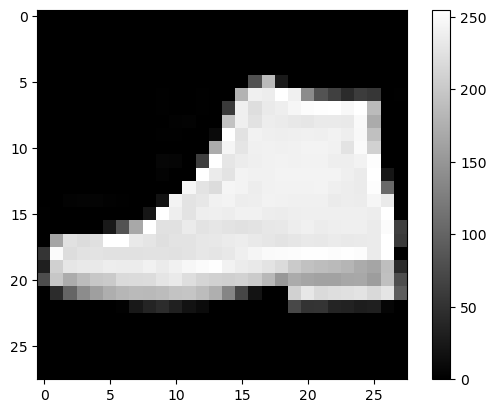

In [12]:
data_idx = 42

plt.figure()
plt.imshow(tr_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

This would correspond to the following label:

Label	Description
0.	T-shirt/top
1.	Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot


In [13]:
tr_labels[data_idx]

9

## Building a Neuron

We can break down building a neuron into 3 steps:
* Defining the architecture
* Intiating training
* Evaluating the model

### The Math
Computers are built with discrete 0s and 1s whereas humans and animals are built on more continuous building blocks. Because of this, some of the first neurons attempted to mimic biological neurons with a linear regression function: $y = mx + b$. The x is like information coming in through the dendrites and the y is like the output through the terminals. As the computer guesses more and more answers to the questions we present it, it will update its variables (m and b) to better fit the line to the data it has seen.

Neurons are often exposed to multivariate data. We're going to build a neuron that takes each pixel value (which is between 0 and 255), and assign it a weight, which is equivalent to our m. Data scientists often express this weight as w. For example, the first pixel will have a weight of w0, the second will have a weight of w1, and so on. Our full equation becomes $y = w0x0 + w1x1 + w2x2 + ... + b$.

Each image is 28 pixels by 28 pixels, so we will have a total of 784 weights. A pixel value of 0 would be black and a pixel value of 255 would be white. Let's look at the raw pixel values of the previous image we plotted. Each number below will be assigned a weight.

In [15]:
vd_images[data_idx]

array([[  0,   0,   0,   0,   0,   0,   0,   0,  26,  10,   5,   5,   5,
          3,   4,   4,   3,   6,  24,   0,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 196, 203, 201, 234, 237,
        233, 231, 229, 196, 190, 207,  73,   0,   3,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   5, 195, 199, 194, 189, 192,
        188, 186, 186, 189, 180, 194,  67,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  32, 202, 195, 193, 186, 193,
        187, 186, 183, 189, 175, 197, 105,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  53, 208, 191, 190, 183, 190,
        188, 186, 184, 186, 167, 195, 132,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  75, 210, 191, 190, 184, 191,
        189, 184, 184, 185, 169, 190, 157,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In the below model, we have two layers:

* Flatten - Converts multidimensional data into 1 dimensional data (ex: a list of lists into a single list).
* Dense - A "row" of neurons. Each neuron has a weight (w) for each input. In the example below, we use the number 10 to place ten neurons.

We will also define an input_shape which is the dimensions of our data. In this case, our 28x28 pixels for each image.

In [16]:
number_of_classes = train_labels.max() + 1
number_of_classes

10.0

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(number_of_classes)
])

### Verifying the model

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


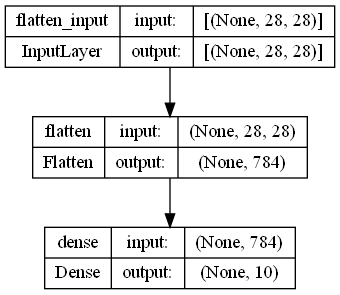

In [19]:
tf.keras.utils.plot_model(model, show_shapes=True)

## Initiate Training

In this case, we're going to use a type of function specific to classification called SparseCategoricalCrossentropy:

* Sparse - for this function, it refers to how our label is an integer index for our categories
* Categorical - this function was made for classification
* Cross-entropy - the more confident our model is when it makes an incorrect guess, the worse its score will be. If a model is 100% confident when it is wrong, it will have a score of negative infinity!
* from_logits - the linear output will be transformed into a probability which can be interpreted as the model's confidence that a particular category is the correct one for the given input.

This type of loss function works well for our case because it grades each of the neurons simultaneously. If all of our neurons give a strong signal that they're the correct label, we need a way to tell them that they can't all be right.

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

## Evaluating the model

In [21]:
history = model.fit(
    tr_images,
    tr_labels,
    epochs = 5,
    verbose = True,
    validation_data = (vd_images, vd_labels)
)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 16.7315 - accuracy: 0.7450 - val_loss: 12.2006 - val_accuracy: 0.7721
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 12.5236 - accuracy: 0.7899 - val_loss: 12.8884 - val_accuracy: 0.7868
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 11.1742 - accuracy: 0.7950 - val_loss: 12.3358 - val_accuracy: 0.7863
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 10.7959 - accuracy: 0.8005 - val_loss: 15.6282 - val_accuracy: 0.7288
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 10.3647 - accuracy: 0.8010 - val_loss: 14.8393 - val_accuracy: 0.7865


In [22]:
model.predict(tr_images[0:10])

1/1 [==============================] - 0s 73ms/step


array([[-5.4248621e+02, -5.0021399e+02, -3.1289825e+02, -3.6135114e+02,
        -2.4130420e+02,  4.8845319e+02, -3.5043884e+01,  4.4762286e+02,
         2.5131216e+02,  7.5479736e+02],
       [ 4.1962491e+02, -2.8041867e+02,  2.2059001e+02,  6.4173416e+01,
         2.7573490e+01, -9.3846021e+02,  2.8161060e+02, -1.8972720e+03,
        -3.4258167e+01, -8.0359070e+02],
       [ 9.2325928e+01,  2.2067392e+01,  4.5056793e+01,  8.5030418e+01,
         9.7006912e+01, -3.2171112e+02,  6.5819489e+01, -5.3029767e+02,
        -4.8872372e+01, -1.7281438e+02],
       [ 1.3972899e+02,  3.2442345e+01,  1.0000545e+02,  1.4899245e+02,
         1.0134251e+02, -4.9183624e+02,  1.7195581e+02, -1.0619097e+03,
        -8.5425095e+01, -6.0691235e+02],
       [ 1.9002907e+02,  1.2188194e+02,  2.6010986e+01,  1.8148170e+02,
         2.1535930e+02, -6.4941205e+02,  1.1252113e+02, -7.8904785e+02,
         4.1864769e+01, -6.9740973e+02],
       [ 3.5662910e+01, -5.1161770e+01,  2.8766861e+02,  6.7305161e+01,
   

In [31]:
output = model.predict(tr_images[data_idx:data_idx+5])
output.shape

1/1 [==============================] - 0s 12ms/step


(5, 10)

In [27]:
def softmax(x):
    """
    Compute softmax function for a batch of input values.
    First dim of the input: batch size.
    Second dim of the input: prob of every class in the output.
    Only sum over the second dim.
    
    Important: Avoid overflow for this function. It overflows for very big numbers like e^10000.

    Args:
        x : 2d numpy float array (batch_size , number_of_classes)
        
    Returns: 
        2d numpy float array containing softmax results (batch_size, number_of_classes)
    """
    
    # Prof. Mark Cramer suggested to apply a stability trick to avoid overflow
    x_shifted = x - np.max(x, axis=1, keepdims=True)
    exps = np.exp(x_shifted)
    softmax_values = exps / np.sum(exps, axis=1, keepdims=True)
    
    return softmax_values

In [34]:
output_probs = softmax(output)

output_probs

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.4382703e-39, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 3.4016712e-35, 0.0000000e+00,
        9.9999952e-01, 0.0000000e+00, 4.4547235e-07, 0.0000000e+00,
        2.1972673e-25, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

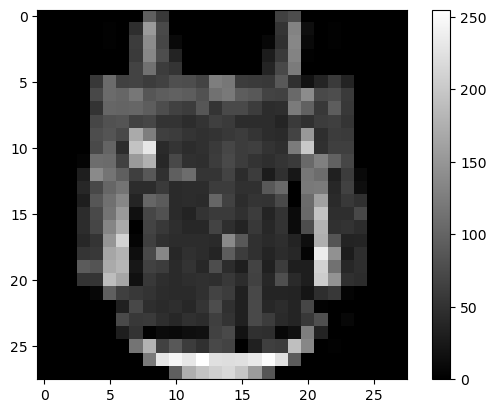

1/1 [==============================] - 0s 14ms/step


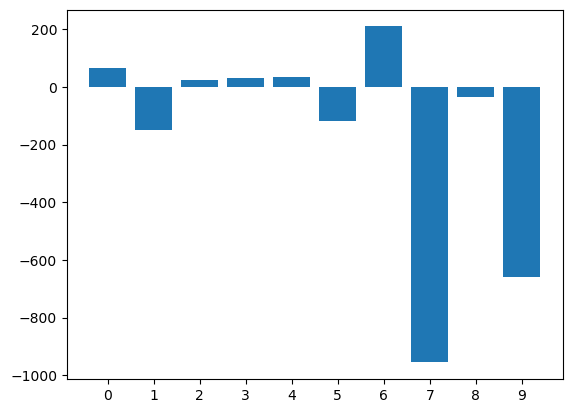

correct answer:  6


In [24]:
data_idx = 8675 # any number up to 59999

plt.figure()
plt.imshow(tr_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

x_values = range(int(number_of_classes))
plt.figure()
plt.bar(x_values, model.predict(tr_images[data_idx:data_idx+1]).flatten())
plt.xticks(range(10))
plt.show()

print("correct answer: ", tr_labels[data_idx])